In [2]:
# your name: Esau Bojorquez Medina
# date: 03/15/24
# course number: CSC 647-01
# assignment/activity # and brief stmt of purpose:
# Activity: Coding Project 3
# Grovers. 

In [3]:
# import qiskit and numpy
from qiskit import QuantumCircuit, visualization
from qiskit import Aer, BasicAer, assemble, transpile, execute
from qiskit.quantum_info import Statevector, Operator
from qiskit.tools.visualization import plot_histogram, plot_state_qsphere,plot_distribution
import qiskit.quantum_info as qi
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Part 0
def qcMaker(numBits):
    builder = QuantumCircuit(numBits)
    #Applying H gates from initialization
    builder.h(range(numBits))
    return builder

def diffuser(builder,numBits):
    builder.x(range(numBits));
    builder.h(range(numBits));
    builder.cx(0,1);
    builder.h(range(numBits));
    builder.x(range(numBits));
    return builder

def oracle1(builder):
    builder.x([0])
    builder.h([1]);
    builder.cx(0,1)
    builder.h([1])
    builder.x(0)
    return builder

def oracle2(builder):
    builder.x([0])
    builder.h([1]);
    builder.cx(0,1)
    builder.h([1])
    builder.x(0)
    
    builder.x([1])
    builder.h([2]);
    builder.cx(1,2)
    builder.h([2])
    builder.x(1)
    return builder


#From PDF notes
def plot_amplitudes_2qb(r, string):
    x_axis = np.arange(0,4,1)
    colors = ['blue', 'blue', 'red', 'blue']
    axis_labels = ['00', '01', '10', '11']
    plt.grid()
    plt.bar(x_axis, r, width=0.25, tick_label=axis_labels, color=colors)
    # Set the y-axis limit
    plt.ylim(-0.75, 1) # Adjust the values as per your requirement
    plt.title(string)
    


------------
Iteration Circuit:  1


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├──■──┤ H ├┤ X ├
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘
Statevector:


<IPython.core.display.Latex object>

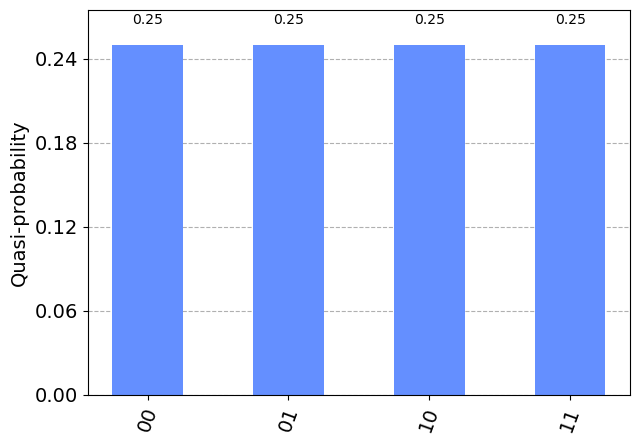

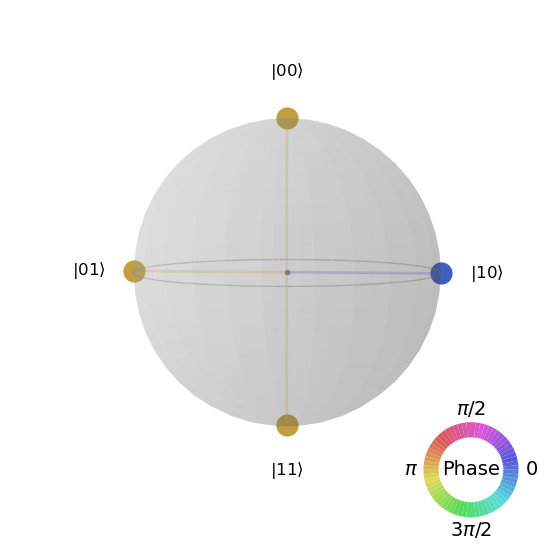

C:\Users\Esau M\anaconda3\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


None

------------
Iteration Circuit:  2


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ X ├──■──┤ X ├┤ X ├┤ H ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤├───┤»
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«          ┌───┐┌───┐
«q_0: ──■──┤ H ├┤ X ├
«     ┌─┴─┐├───┤├───┤
«q_1: ┤ X ├┤ H ├┤ X ├
«     └───┘└───┘└───┘
Statevector:


<IPython.core.display.Latex object>

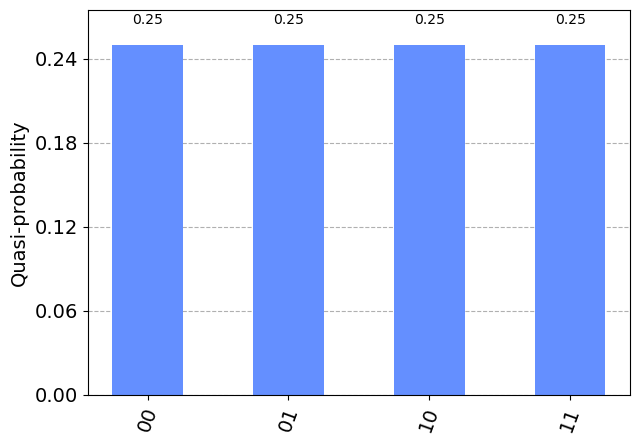

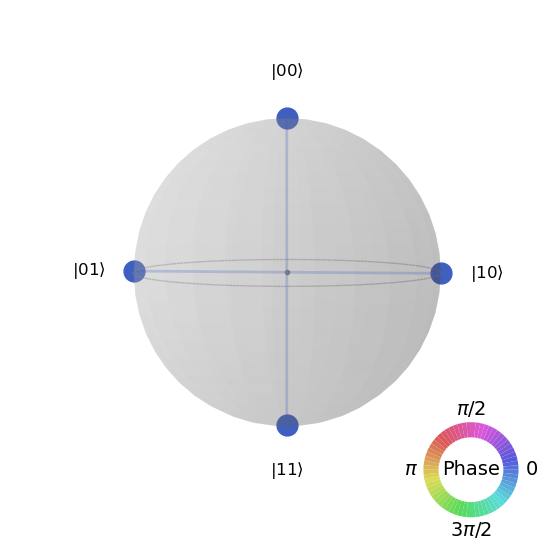

None

------------
Iteration Circuit:  3


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ X ├──■──┤ X ├┤ X ├┤ H ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤├───┤»
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«          ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐
«q_0: ──■──┤ H ├┤ X ├┤ X ├──■──┤ X ├┤ X ├┤ H ├──■──┤ H ├┤ X ├
«     ┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤
«q_1: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘
Statevector:


<IPython.core.display.Latex object>

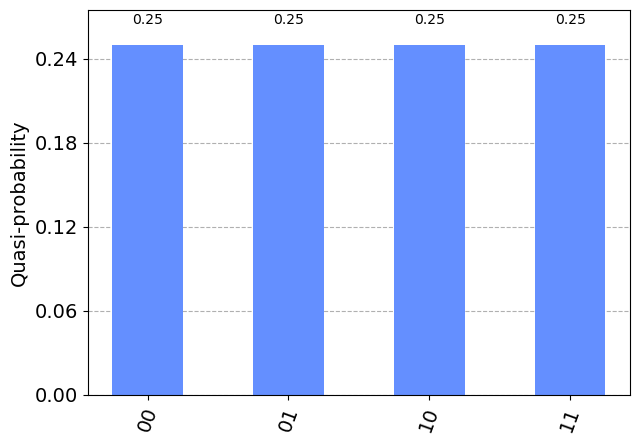

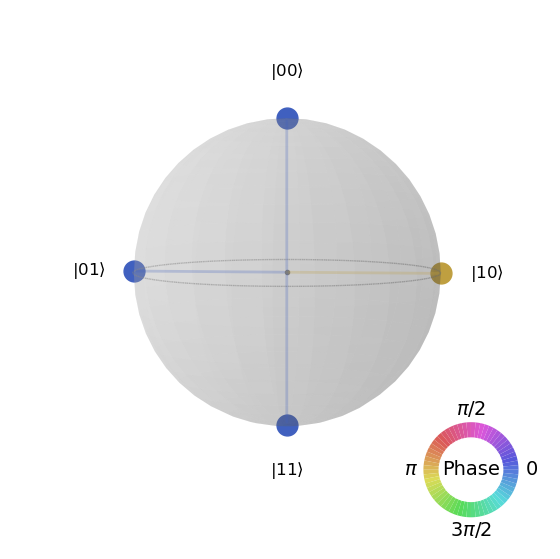

None

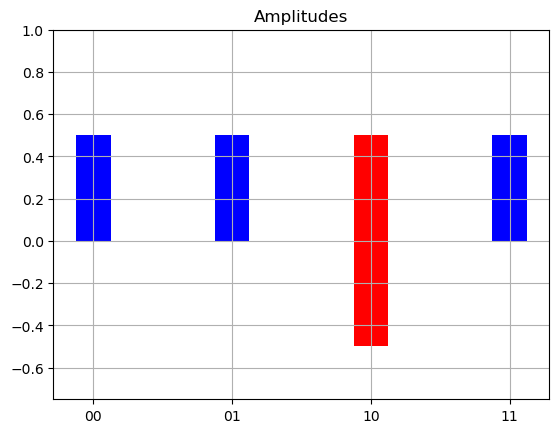

In [5]:
#PART 1

# Making our 2 qubit circuit
qc = qcMaker(2)


# Three iterations
iterations = 3

for i in range(iterations):
    print("------------\nIteration Circuit: ", i+1)
    # Apply Oracle
    qc = oracle1(qc)
    
    #Unitary Matrix after oracle
    display(Operator(qc).draw("latex"))
 
    # Apply Diffuser
    qc = diffuser(qc,2)

    # Print the circuit
    print(qc)

    # Print the state vector
    print("Statevector:") 
    display(Statevector(qc).draw("latex"))
    
    #Print distribution
    display(plot_distribution(Statevector(qc).probabilities_dict()))
    
    # Plot with qspheres 
    display(plot_state_qsphere(Statevector(qc)))
    
    
    # Plotting amplitudes 
    display(plot_amplitudes_2qb(Statevector(qc),"Amplitudes"))

    
    
# Questions:

# What do you observe about the distribution of probability 
# amplitudes as you go through iterations 1, 2, and 3?

#  The distribution at each of the iterations was a consistent 
#  25% distribution for each solution state. 

# What is the count of the number of single qubit and multi-qubit
# gates in your circuit for one iteration (two separate numbers)?
# For 3 iterations?
#  Single: 14   Multi: 2  for iteration 1
#  Single: 26   Multi: 4  for iteration 2
#  Single: 38   Multi: 6  for iteration 3



------------
Iteration Circuit: 1


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├
     ├───┤├───┤┌─┴─┐├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     ├───┤├───┤└───┘└───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤└───┘
q_2: ┤ H ├┤ H ├───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├─────
     └───┘└───┘               └───┘└───┘└───┘└───┘└───┘└───┘     
Statevector:


<IPython.core.display.Latex object>

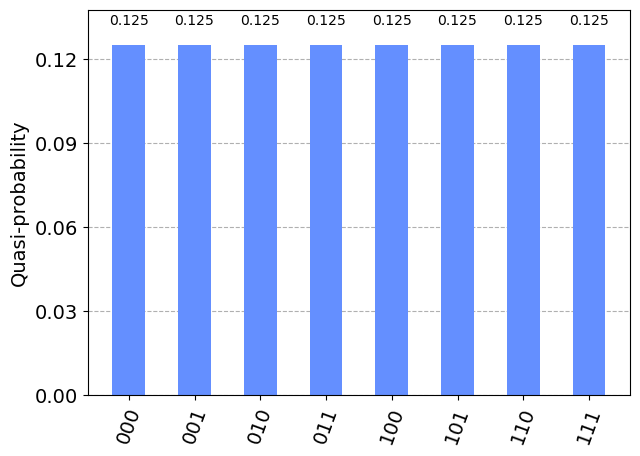

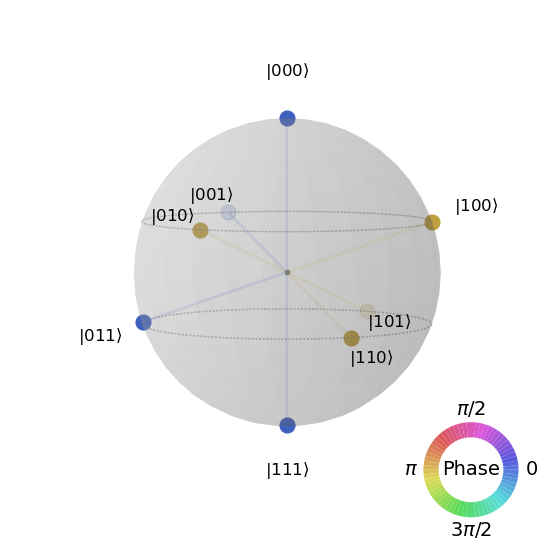

------------
Iteration Circuit: 2


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐┌───┐     »
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├┤ X ├──■──»
     ├───┤├───┤┌─┴─┐├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌─┴─┐»
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
     ├───┤├───┤└───┘└───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘»
q_2: ┤ H ├┤ H ├───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├──────────»
     └───┘└───┘               └───┘└───┘└───┘└───┘└───┘└───┘└───┘          »
«     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐
«q_0: ┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├
«     ├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤
«q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
«     └───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤└───┘
«q_2: ──────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├─────
«               └───┘└───┘└───┘└───┘└───┘└───┘     
Statevector:


<IPython.core.display.Latex object>

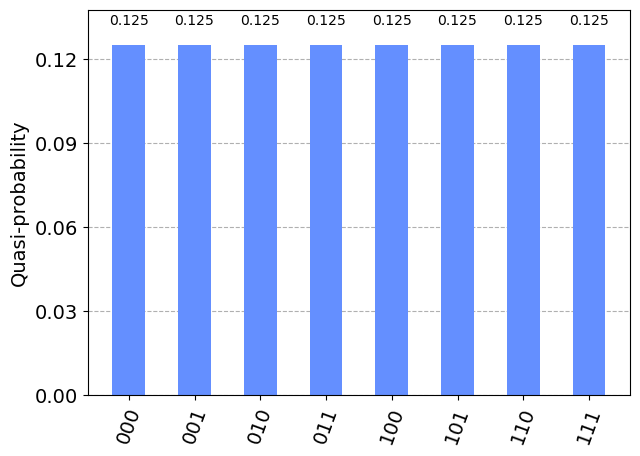

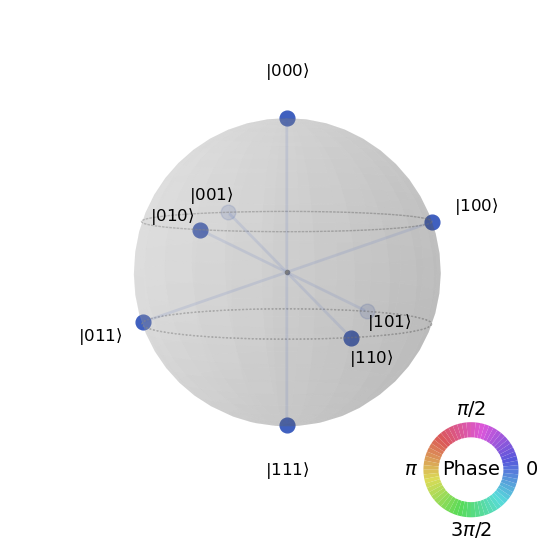

------------
Iteration Circuit: 3


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐┌───┐     »
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├┤ X ├──■──»
     ├───┤├───┤┌─┴─┐├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌─┴─┐»
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
     ├───┤├───┤└───┘└───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘»
q_2: ┤ H ├┤ H ├───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├──────────»
     └───┘└───┘               └───┘└───┘└───┘└───┘└───┘└───┘└───┘          »
«     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
«q_0: ┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├┤ X ├──■──┤ X ├┤ X ├┤ H ├»
«     ├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤└───┘»
«q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├──■──»
«     └───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘└───┘└───┘┌─┴─┐»
«q_2: ──────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├────────────────────

<IPython.core.display.Latex object>

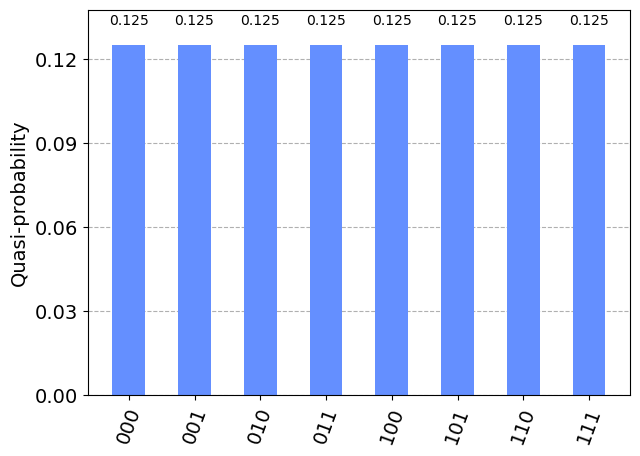

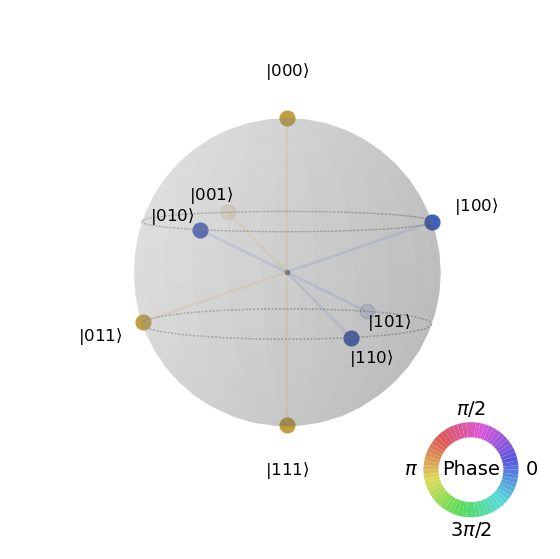

------------
Iteration Circuit: 4


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐┌───┐     »
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├┤ X ├──■──»
     ├───┤├───┤┌─┴─┐├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌─┴─┐»
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
     ├───┤├───┤└───┘└───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘»
q_2: ┤ H ├┤ H ├───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├──────────»
     └───┘└───┘               └───┘└───┘└───┘└───┘└───┘└───┘└───┘          »
«     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
«q_0: ┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├┤ X ├──■──┤ X ├┤ X ├┤ H ├»
«     ├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤└───┘»
«q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├──■──»
«     └───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘└───┘└───┘┌─┴─┐»
«q_2: ──────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├────────────────────

<IPython.core.display.Latex object>

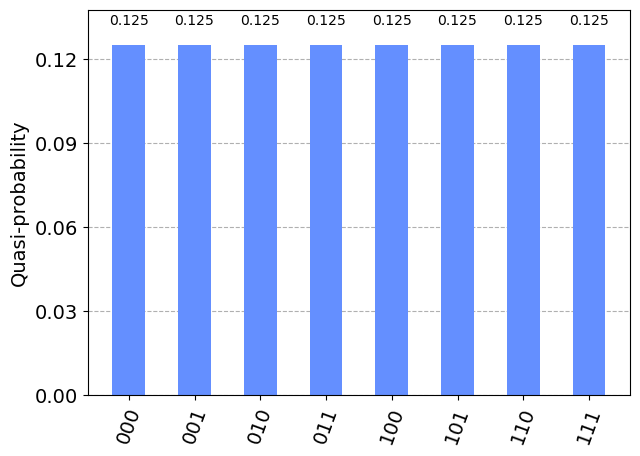

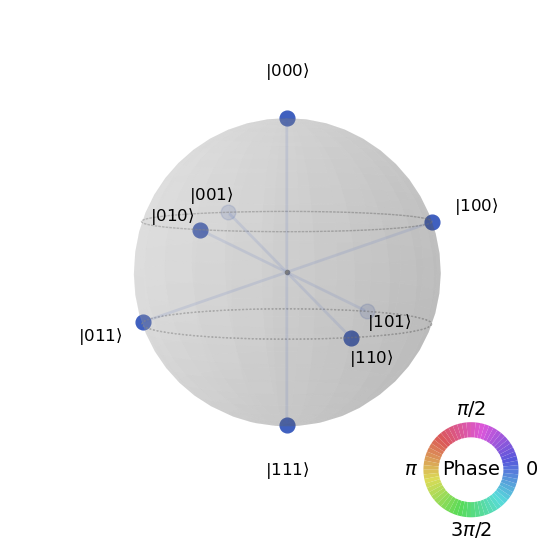

------------
Iteration Circuit: 5


<IPython.core.display.Latex object>

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐┌───┐     »
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├┤ X ├──■──»
     ├───┤├───┤┌─┴─┐├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌─┴─┐»
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
     ├───┤├───┤└───┘└───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘»
q_2: ┤ H ├┤ H ├───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├──────────»
     └───┘└───┘               └───┘└───┘└───┘└───┘└───┘└───┘└───┘          »
«     ┌───┐┌───┐┌───┐                    ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
«q_0: ┤ X ├┤ X ├┤ H ├─────────────────■──┤ H ├┤ X ├┤ X ├──■──┤ X ├┤ X ├┤ H ├»
«     ├───┤├───┤└───┘┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌─┴─┐├───┤├───┤└───┘»
«q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├──■──»
«     └───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘└───┘└───┘┌─┴─┐»
«q_2: ──────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├────────────────────

<IPython.core.display.Latex object>

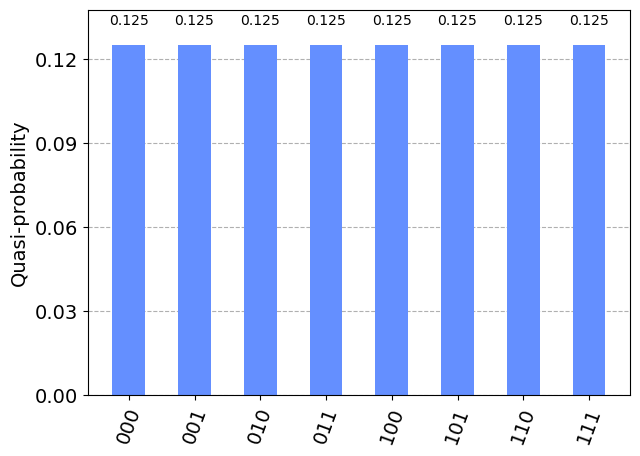

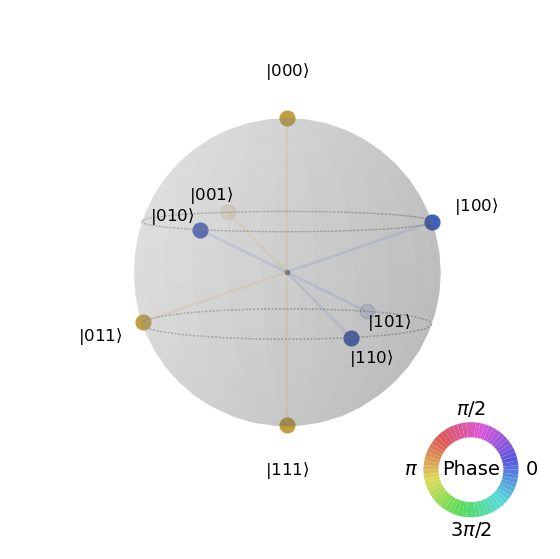

In [6]:
#Part 2

# Making our 3 qubit circuit
QC3 = qcMaker(3)


# Five iterations
iterations = 5

for i in range(iterations): 
    print("------------\nIteration Circuit:", i+1)
    # Appling Oracle
    QC3 = oracle2(QC3)
    
    # Appling Diffuser
    QC3 = diffuser(QC3,3)
    #Unitary Matrix after oracle
    display(Operator(QC3).draw("latex"))
    
    # Print the circuit
    print(QC3)

    # Print the state vector
    print("Statevector:") 
    display(Statevector(QC3).draw("latex"))

    # Plot the probability distribution
    display(plot_distribution(Statevector(QC3).probabilities_dict()))
    
    # Plot with qspheres 
    display(plot_state_qsphere(Statevector(QC3)))
    
    
    # Questions:

# What do you observe about the distribution of probability amplitudes as 
# you go through iterations 1 through 5

#  The distribution at each of the iterations was also pretty consistent 
#  Only this time we had 0.125 distribution for each solution states. 

# What is the count of the number of single qubit and multi-qubit gates in 
# your circuit for one iteration (two separate numbers)? 
# For 2 iterations? For 5 iterations?

#  Single: 22   Multi: 3  for iteration 1
#  Single: 42   Multi: 6  for iteration 2
#  Single: 54   Multi: 9  for iteration 3
#  Single: 68   Multi: 12  for iteration 4
#  Single: 80   Multi: 15  for iteration 5    